# GDP vs. Store Closings

## Read in the file

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline
plt.style.use('ggplot')


sc = pd.read_csv("GDP vs Store Closings1.csv", skiprows=19)
sc.columns = ['Date','GDP','Store Closings']
sc.Date = pd.to_datetime(sc.Date)

sc['Year'] = sc['Date'].dt.year
sc['Quarter'] = sc['Date'].dt.quarter



## Quick data exploration

In [2]:
sc.describe()

,GDP,Store Closings,Year,Quarter
count,88.000000,87.000000,88.000000,88.000000
mean,4.328409,35.137931,2005.500000,2.500000
std,2.746155,6.130694,6.380646,1.124441
min,-7.700000,26.000000,1995.000000,1.000000
25%,3.200000,31.000000,2000.000000,1.750000
50%,4.700000,34.000000,2005.500000,2.500000
75%,5.825000,37.500000,2011.000000,3.250000
max,10.200000,51.000000,2016.000000,4.000000


In [3]:
sc.corr()

,GDP,Store Closings,Year,Quarter
GDP,1.000000,0.159127,-0.326908,0.059744
Store Closings,0.159127,1.000000,-0.475550,-0.204704
Year,-0.326908,-0.475550,1.000000,0.000000
Quarter,0.059744,-0.204704,0.000000,1.000000


A very low correlation score tells us these measurements may not have a relationship.

## Quick Plots

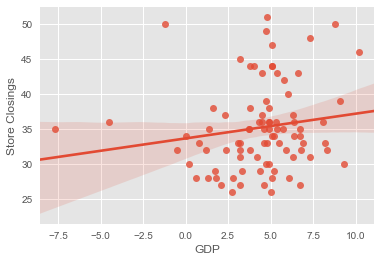

In [4]:
sns.regplot(sc.GDP,sc['Store Closings'], ci=95)

Visual confirmation of a lack of relationship on the 95% CI best fit line

## Next Steps

Further exploration may uncover a relationship.  
1) Since quarterly GDP measurements contain seasonality, it's possible that yearly GDP and yearly store closings  
2) It might be worthwhile to remove outliers or study a tighter time frame  

## Deeper Exploration

### Let's do away with seasonality by aggregating on the year  
We will do a simple average for GPD of the year, although this won't actually be the yearly GDP.  
Also, we need to understand that there are only three quarters for 2016, so we will extraploate the total for the year by multiplying 2016 Store Closings by 4/3.

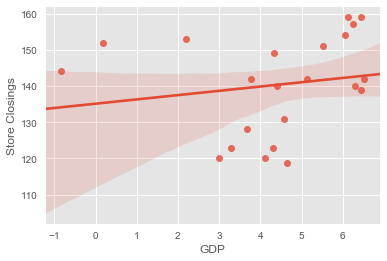

In [5]:
sc_yearly =  sc.groupby(['Year'])['GDP','Store Closings'].agg({'GDP':'mean','Store Closings':'sum'})
sc_yearly.loc[2016] = sc_yearly.loc[2016] *4/3

sns.regplot('GDP','Store Closings', data=sc_yearly, ci=90)




In [6]:
sc_yearly.describe()

,GDP,Store Closings
count,22.000000,22.000000
mean,4.381061,140.303030
std,1.976292,13.464399
min,-0.850000,118.666667
25%,3.700000,128.750000
50%,4.487500,142.000000
75%,6.106250,151.750000
max,6.525000,159.000000


In [7]:
sc_yearly.corr()

,GDP,Store Closings
GDP,1.000000,0.173896
Store Closings,0.173896,1.000000


Slightly better correlation now that we've aggregated by year, but still no strong correlation

(array([ 3.,  2.,  1.,  1.,  0.,  6.,  1.,  1.,  4.,  3.]),
 array([ 118.66666667,  122.7       ,  126.73333333,  130.76666667,
         134.8       ,  138.83333333,  142.86666667,  146.9       ,
         150.93333333,  154.96666667,  159.        ]),
 <a list of 10 Patch objects>)

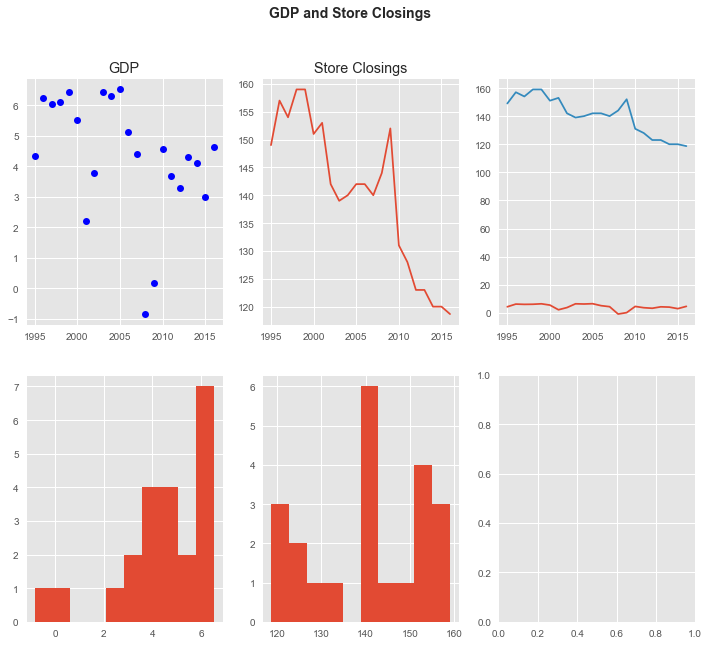

In [8]:
a = fig, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(12,10))
fig.suptitle('GDP and Store Closings', fontsize=14, fontweight='bold')
ax1.plot(sc_yearly.GDP, 'bo')
ax1.set_title('GDP')
ax2.plot(sc_yearly['Store Closings'])
ax2.set_title('Store Closings')
ax3.plot(sc_yearly)
ax4.hist(sc_yearly.GDP)
ax5.hist(sc_yearly['Store Closings'])


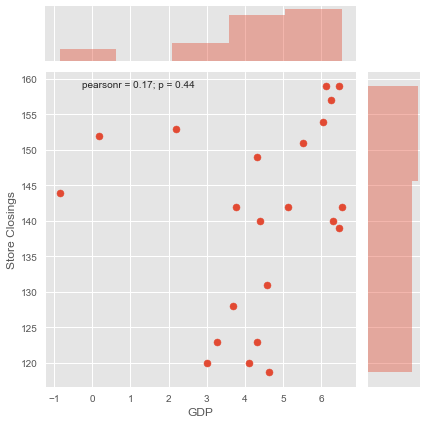

In [9]:
sns.jointplot('GDP','Store Closings', data=sc_yearly)

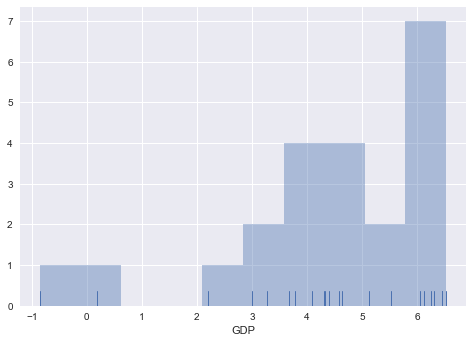

In [10]:
sns.set(color_codes=True)
sns.distplot(sc_yearly.GDP, kde = False, bins = 10,rug=True)

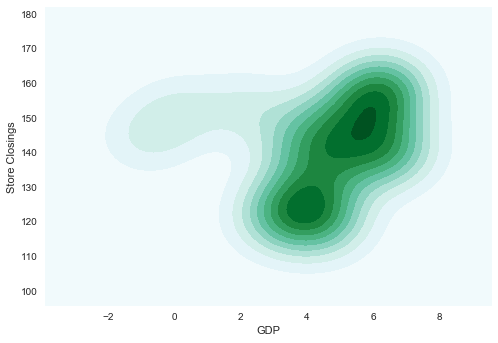

In [11]:
ax = sns.kdeplot(sc_yearly.GDP, sc_yearly['Store Closings'],shade=True)

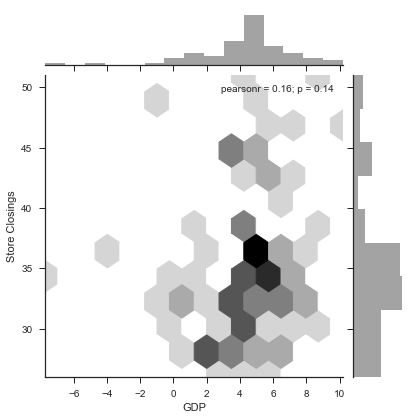

In [12]:
with sns.axes_style("ticks"):
    sns.jointplot(x=sc.GDP, y=sc['Store Closings'], kind="hex", color="k");

C:\Python\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


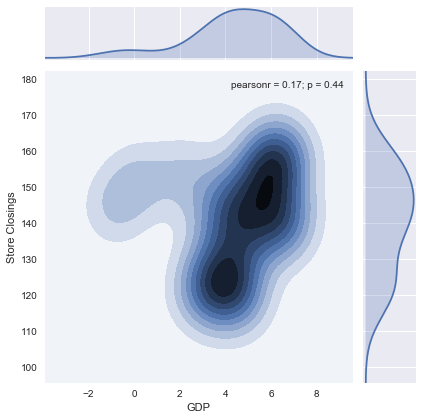

In [13]:
sns.jointplot(x='GDP', y='Store Closings', data=sc_yearly, kind="kde");

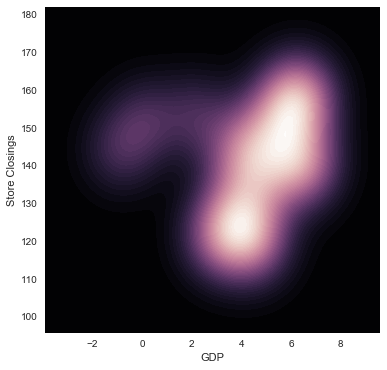

In [14]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(sc_yearly.GDP, sc_yearly['Store Closings'], cmap=cmap, n_levels=60, shade=True);

C:\Python\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


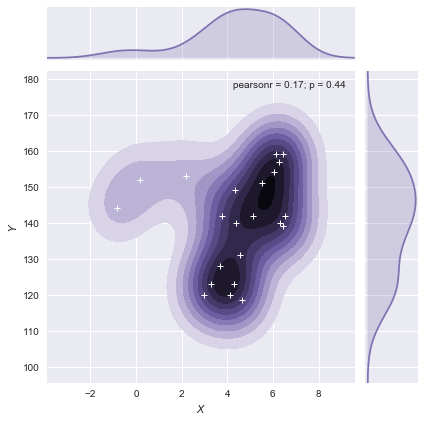

In [15]:
g = sns.jointplot(x='GDP', y='Store Closings', data=sc_yearly, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

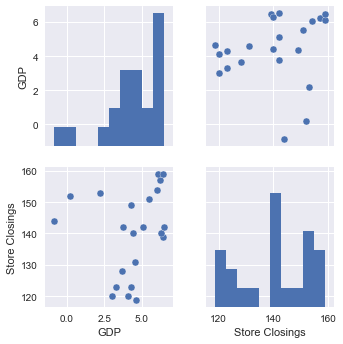

In [16]:
sns.pairplot(sc_yearly)

C:\Python\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


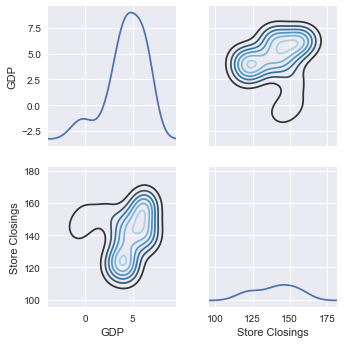

In [17]:
g = sns.PairGrid(sc_yearly)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

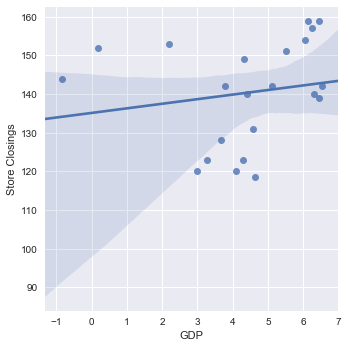

In [18]:
sns.lmplot(x='GDP', y='Store Closings', data=sc_yearly)

C:\Python\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


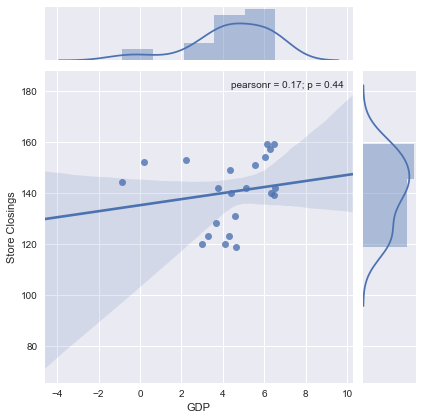

In [19]:
sns.jointplot(x="GDP", y="Store Closings", data=sc_yearly, kind="reg");

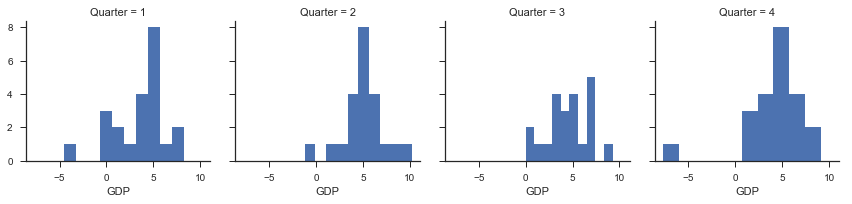

In [20]:
sns.set(style="ticks")
tips = sns.load_dataset("tips")
g = sns.FacetGrid(sc, col='Quarter')
g.map(plt.hist, 'GDP');

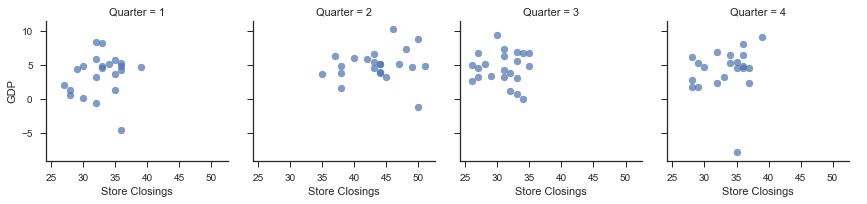

In [21]:
g = sns.FacetGrid(sc, col="Quarter")
g.map(plt.scatter, "Store Closings", "GDP", alpha=.7)
g.add_legend();

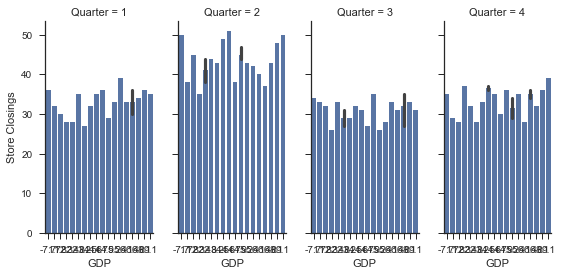

In [22]:
g = sns.FacetGrid(sc, col="Quarter", size=4, aspect=.5)
g.map(sns.barplot, "GDP", "Store Closings");

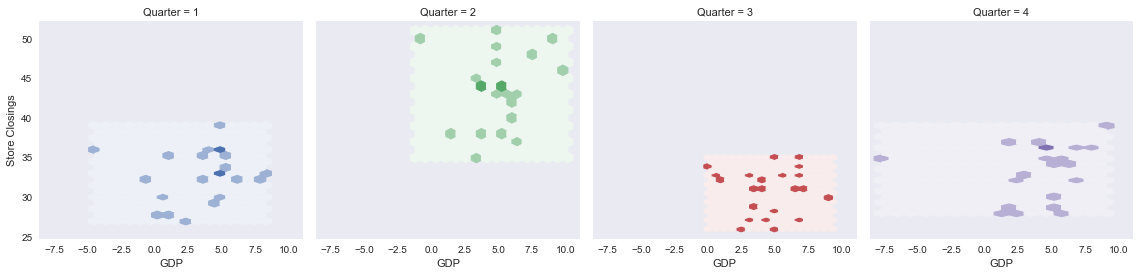

In [23]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(sc, hue="Quarter", col="Quarter", size=4)
g.map(hexbin, "GDP", "Store Closings");

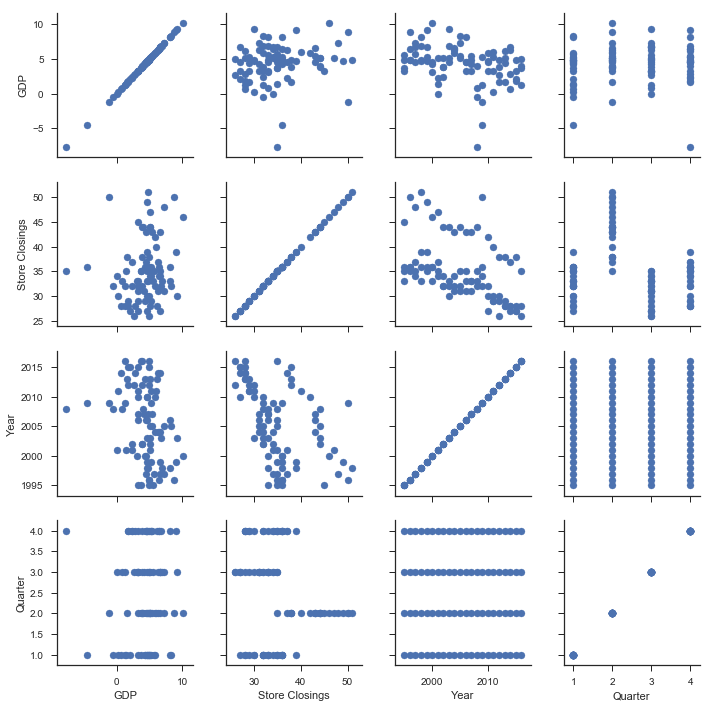

In [24]:

g = sns.PairGrid(sc)
g.map(plt.scatter);

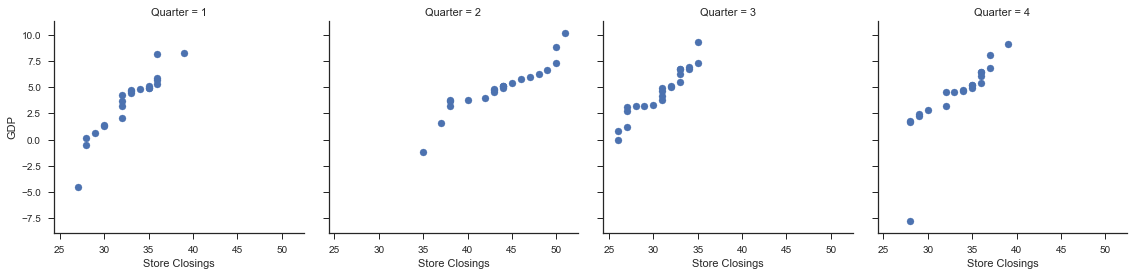

In [25]:
from scipy import stats

def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(sc, col="Quarter", size=4)
g.map(qqplot, "Store Closings", "GDP");

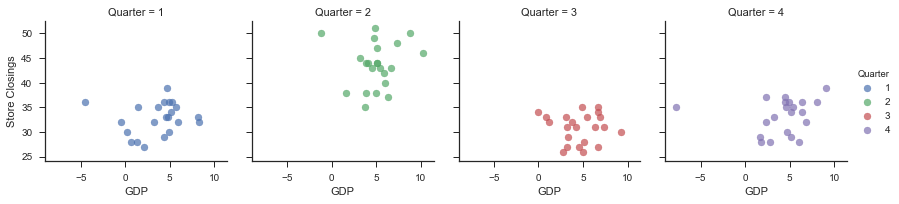

In [26]:
g = sns.FacetGrid(sc, col="Quarter", hue="Quarter")
g.map(plt.scatter, "GDP", "Store Closings", alpha=.7)
g.add_legend();

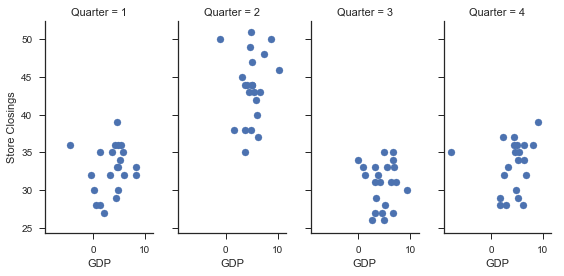

In [27]:
g = sns.FacetGrid(sc, col="Quarter", size=4, aspect=.5)
g.map(plt.scatter, "GDP", "Store Closings");

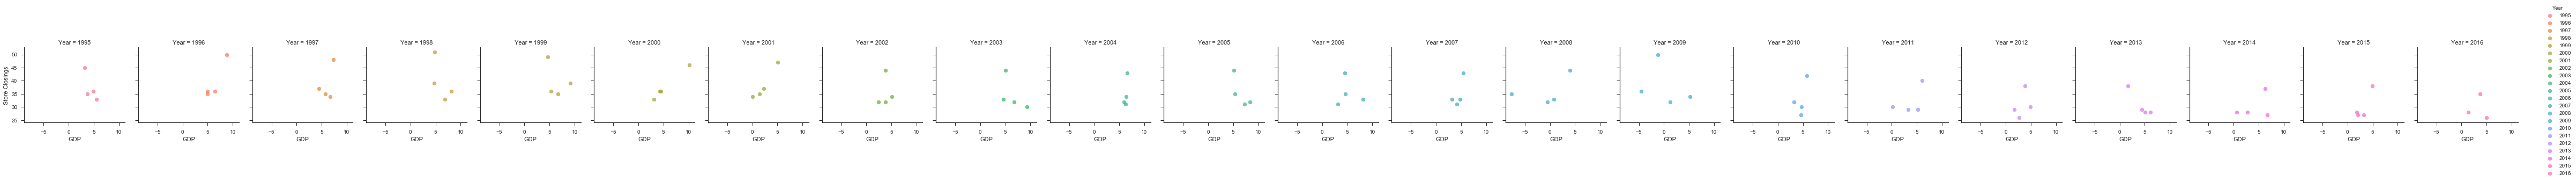

In [28]:
g = sns.FacetGrid(sc, col="Year", hue="Year")
g.map(plt.scatter, "GDP", "Store Closings", alpha=.7)
g.add_legend();